In [97]:
import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
df.isnull().sum() # 결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
df['Age'].fillna(-1, inplace=True) # 선생님은 나이 결측치를 mean으로 하심
df.isnull().sum() # Age 부분 결측치 0으로 채우고 확인

C:\Users\M\AppData\Local\Temp\ipykernel_13768\1294028578.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(-1, inplace=True) # 선생님은 나이 결측치를 mean으로 하심


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [100]:
# df[['Cabin', 'Embarked']] = df[['Cabin', 'Embarked']].fillna('Unknown')
df.drop(columns='Cabin', inplace=True) # 객실번호는 그냥 삭제하심 (등급이 있어서)
df.isnull().sum() # 객실번호, 탑승구는 UnKnown으로 채움

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) # Embarked는 최빈값

Text(0.5, 1.0, '생존사와 사망자 수')

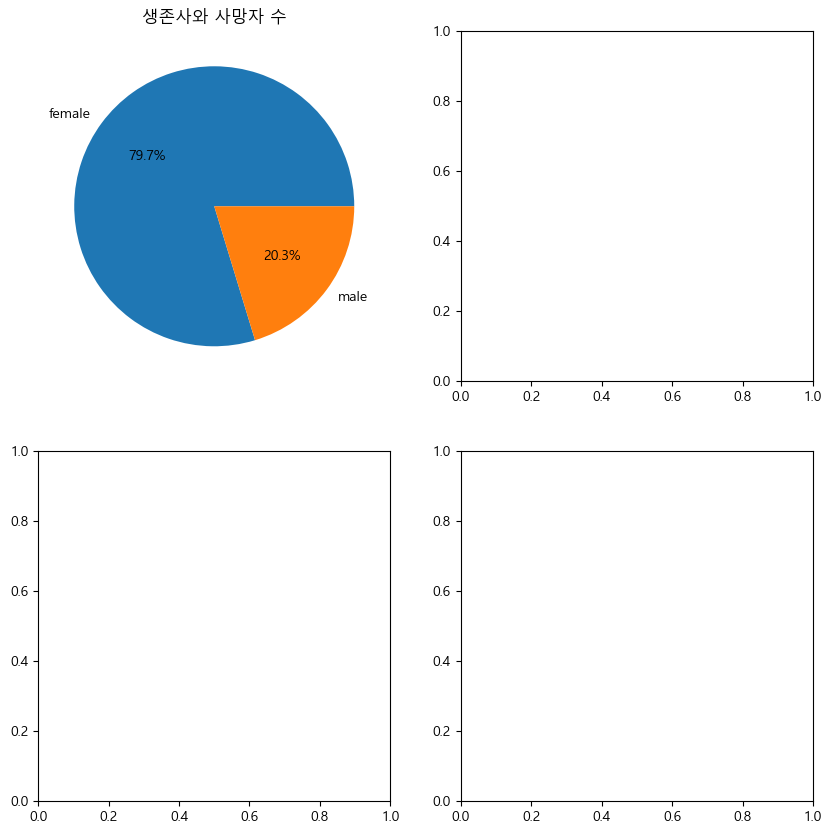

In [101]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

sur = df.groupby(['Sex'])['Survived'].mean()
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].pie(sur.values, labels =sur.index, autopct='%1.1f%%')
ax[0,0].set_title('생존사와 사망자 수')



In [102]:
#  성별 생존률
df.groupby('Sex')['Survived'].mean()*100 # 성별끼리 하나로 묶은 후 Survived의 평균을 구해라

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [103]:
# 좌석 등급에 따른 생존률
df.groupby('Pclass')['Survived'].mean()*100 

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [104]:
# 항구 별 생존률
df.groupby('Embarked')['Survived'].mean()*100 

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

In [105]:
data = df[(df['Sex']=='female')&(df['Survived']==1)] # 여자면서 생존 한 사람
data['Age'].describe()
# df['Sex'].value_counts()

count    233.000000
mean      24.236052
std       16.930307
min       -1.000000
25%       14.000000
50%       24.000000
75%       35.000000
max       63.000000
Name: Age, dtype: float64

In [106]:
# 성별과 좌석 등급 생존자
df.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='sum')

Pclass,1,2,3
Sex,,,
female,91,70,72
male,45,17,47


In [107]:
# 성별에 따른 생존자?
df.pivot_table(index='Sex', columns='Embarked', values='Survived', aggfunc='sum')


Embarked,C,Q,S
Sex,,,
female,64,27,142
male,29,3,77


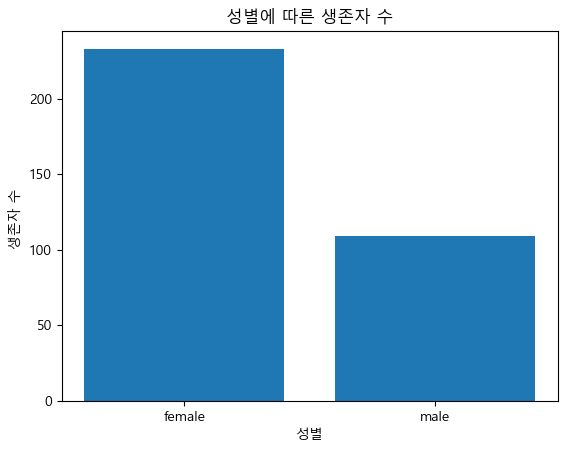

In [108]:
s1 = df[ df['Survived']==1]['Sex'].value_counts()
fig, ax = plt.subplots()
ax.bar(s1.index, s1.values)
ax.set_title('성별에 따른 생존자 수')
ax.set_xlabel('성별')
ax.set_ylabel('생존자 수 ')
plt.show()

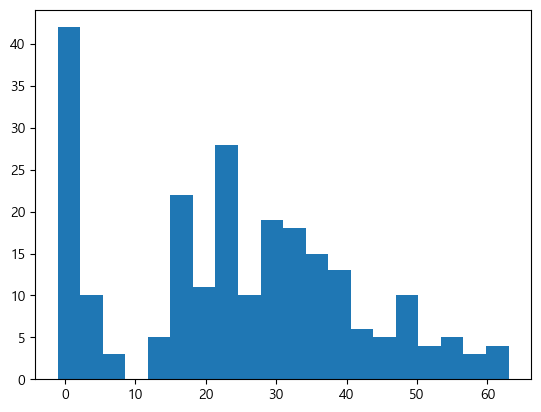

In [109]:
# 여성 생존자 나이 분포 (***선생님이랑 그래프가 다름)
data = df[(df['Sex']=='female')&(df['Survived']==1)]['Age']
fig, ax = plt.subplots()
ax.hist(data, bins=20)

plt.show()

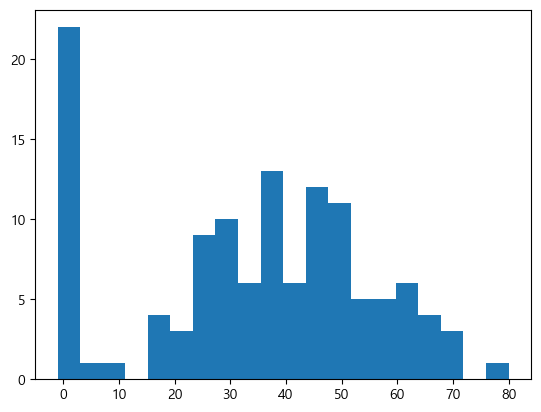

In [110]:
# 남성 승객 중 1등석 탑승자의 나이 분포 
data = df[(df['Sex']=='male')&(df['Pclass']==1)]['Age']
fig,ax = plt.subplots()
ax.hist(data, bins=20)

plt.show()

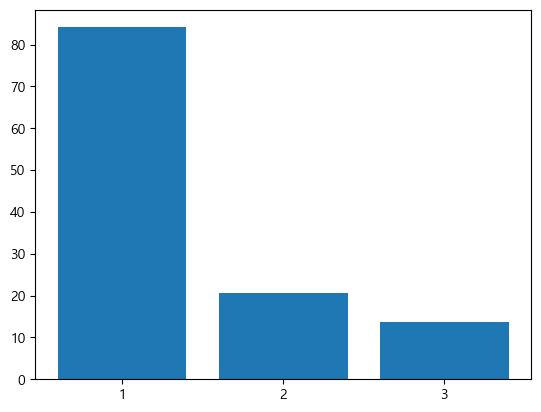

In [112]:
# 좌성 등급에 따른 평균 운임요금 시각화
data = df.groupby('Pclass')['Fare'].mean()

fig, ax = plt.subplots()
ax.bar(data.index, data.values)
ax.set_xticks([1,2,3])
plt.show()

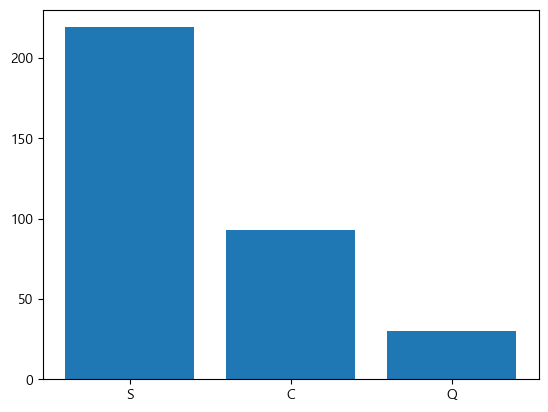

In [113]:
# 항구별 생존자 수 시각화
data = df[ df['Survived']==1]['Embarked'].value_counts()

fig,ax = plt.subplots()
ax.bar(data.index, data.values)

plt.show()